# Week 5 - Classification

Acknowledgements to Dr. Malka Guillot who prepared the first version of this notebook.

In social sciences there are many policy problems that can make use of classification algorithms from machine learning (and more in general of prediction problems). Consider for instance the problem of investigating and prosecuting corrupt politicians: since such investigations are costly both in terms of monetary cost for the government and reputation for the politician, investigations should target politicians that are more likely to be corrupt. However, ex-ante we do not observe if a politician is corrupt but we could use records from previous investigations to train a classifier that predicts corrupt politicians. 

**Do you see any problems with such classifier?**

We do not see people in the data that have a very low probability of being corrupt as the decision to investigate was not random. This problem remains even if the investigations were correctly targeting those politicians with the highest probability of investigation (?).

You will have the chance to approach another very important policy problem, which is also a very hot research topic. However, in today's notebook we will not focus on meaningful examples in terms of research questions and policy. Instead, we will go through different examples to let you gain familiarity with classifiers, their use and their evaluation metrics.

Classification belongs like regression to the field of **supervised learning**. 

**What is the difference between regression and classification tasks?**

regression has a continuous outcome, classification has a binary or multi-class outcome.

In [4]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Simple classifier

In this first part we will use a dataset of beers with information about beers' flavor and alcohol content. The goal of this clasisfication task is to predict whether a beer is yummy or not from these characteristics.

In [5]:
import os
data=os.path.dirname(os.getcwd())+'/data/' 

In [6]:
import pandas as pd

# read some data
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
print(beer_data.shape)

(225, 5)


In [7]:
beer_data.head()

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0

### Visualy inspect data using `seaborn`

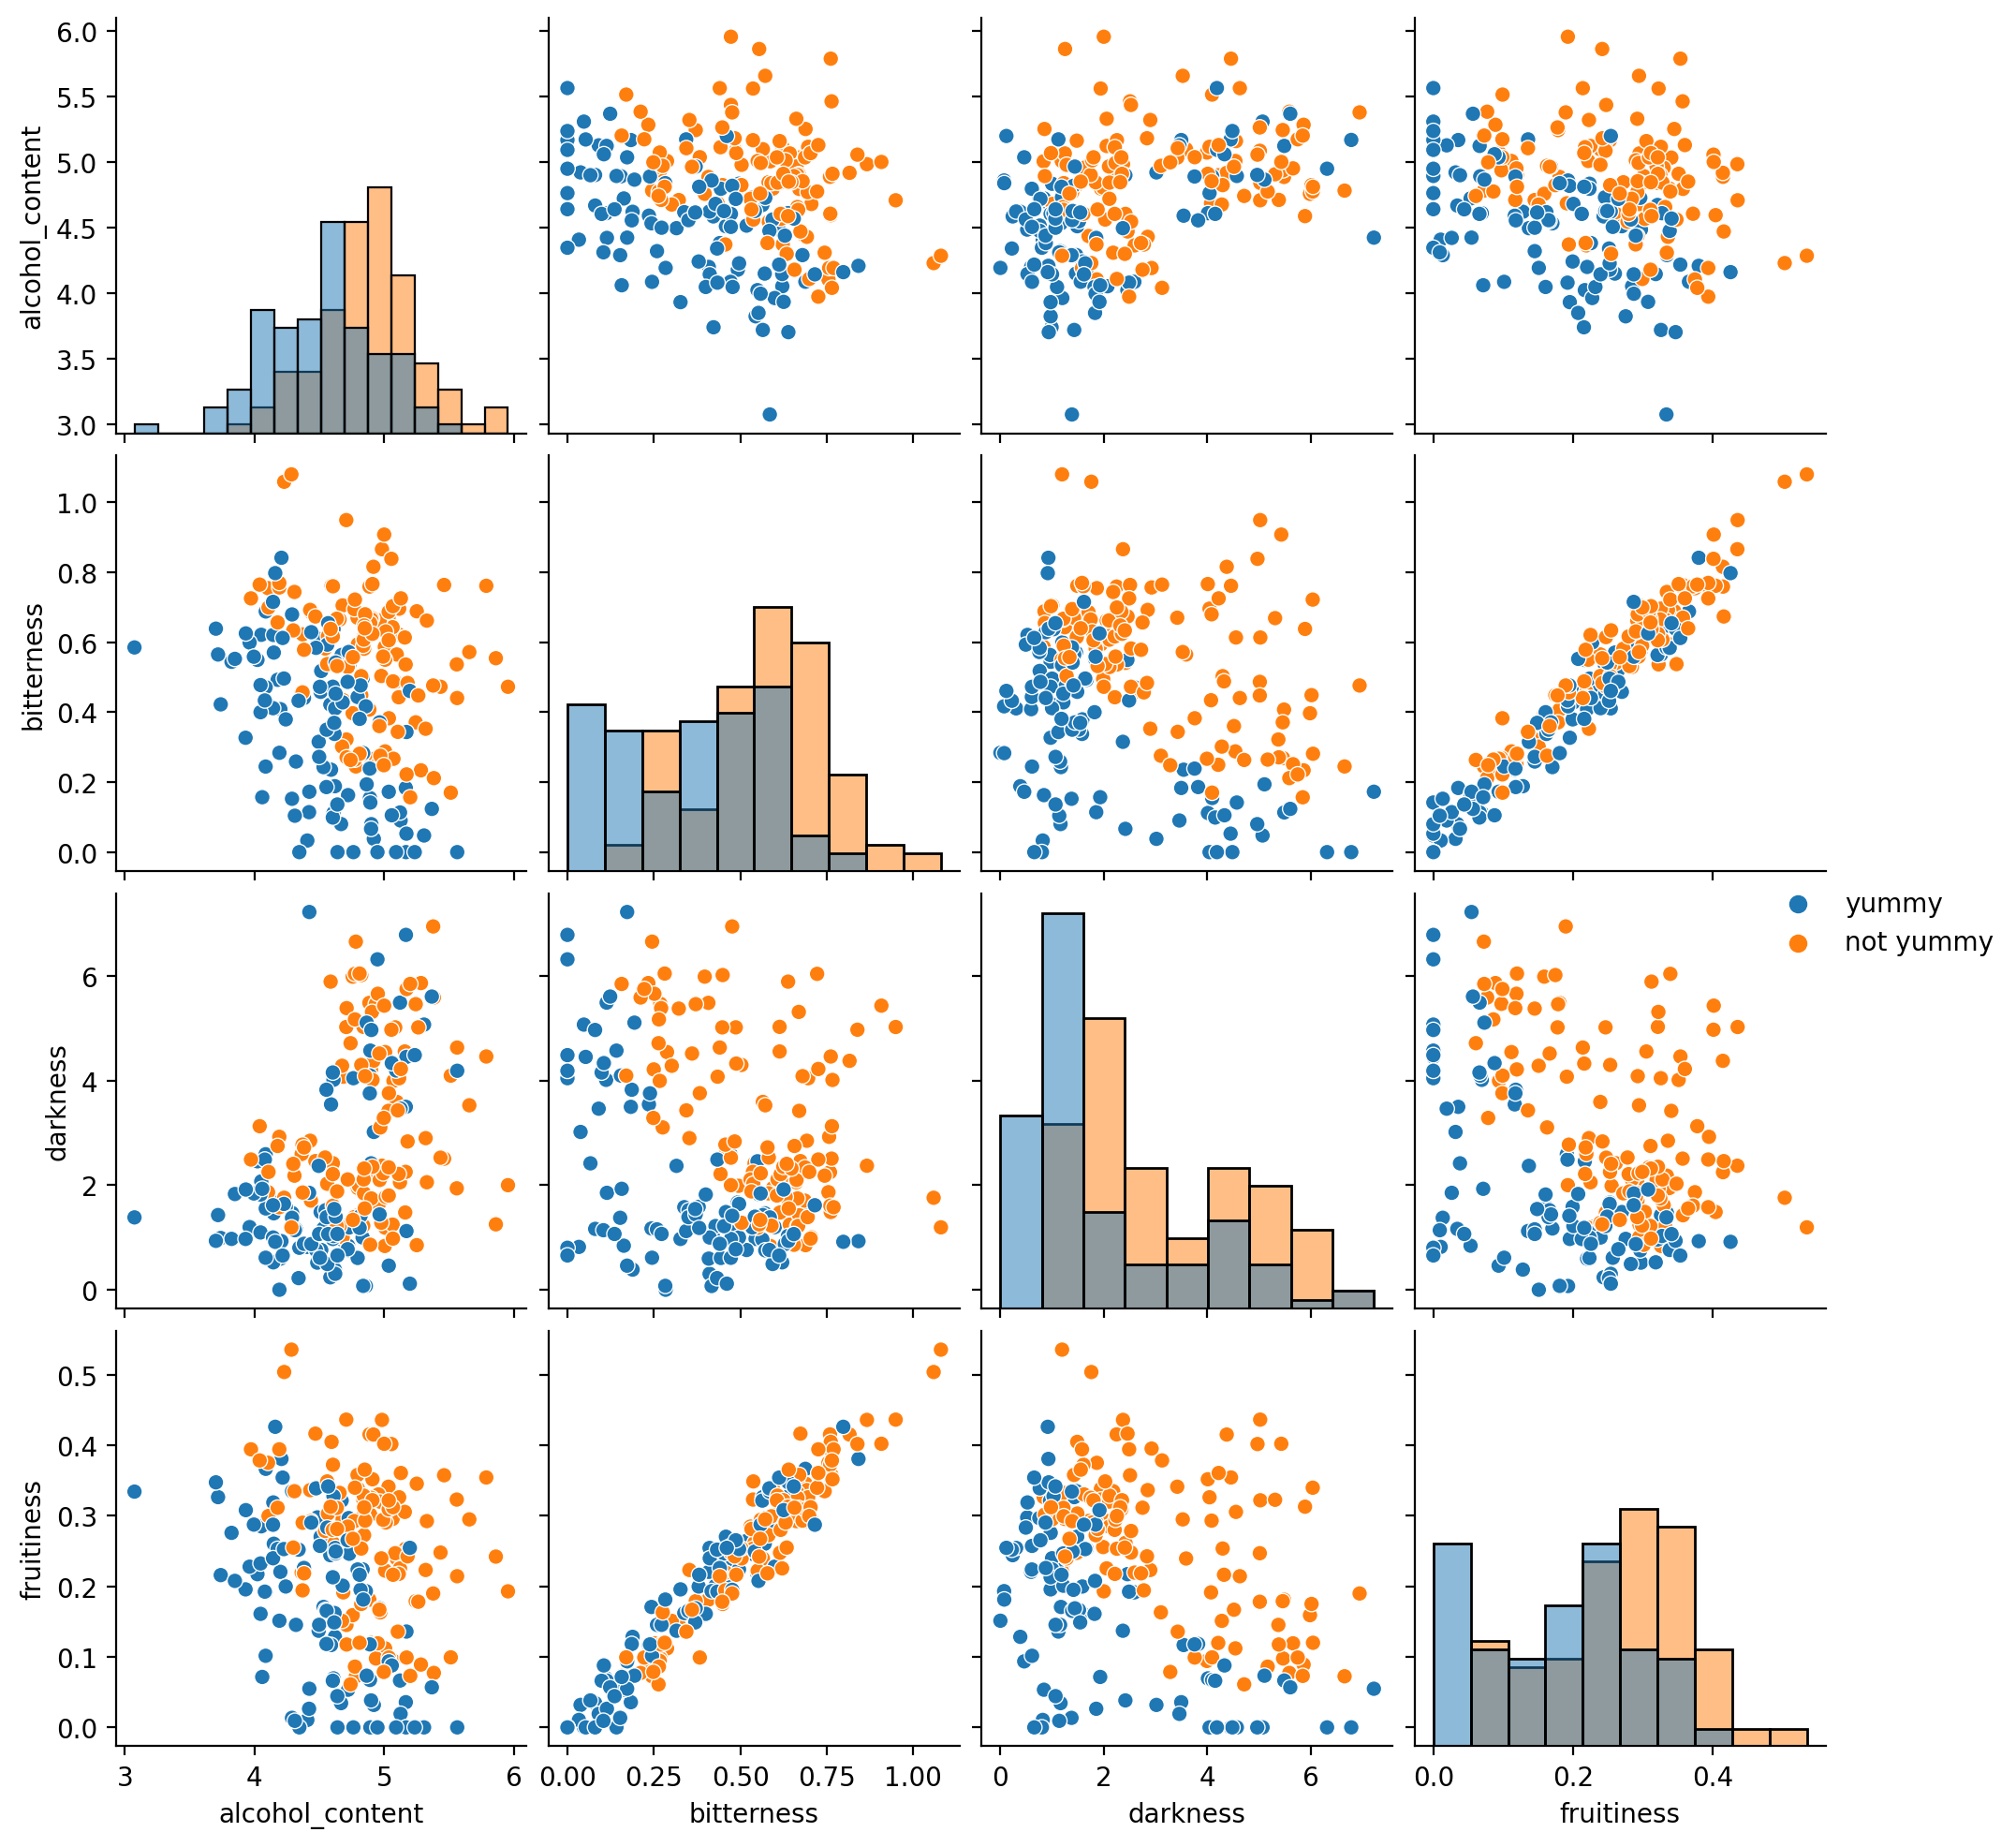

In [8]:
import seaborn as sns
#sns.set(style="ticks")


plot = sns.pairplot(beer_data, hue="is_yummy", diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['yummy', 'not yummy']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

### Prepare data: split features and labels

In [9]:
# all columns up to the last one:
X = beer_data.iloc[:, :-1]
# only the last column:
y = beer_data.iloc[:, -1]

### Start machine learning using scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 

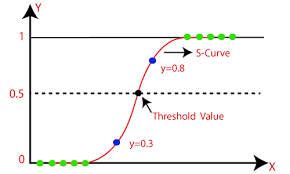

In [11]:
# Fit
classifier.fit(X, y)

# scores (probabilities)
y_scores = classifier.fit(X, y).predict_proba(X)[:,1] # the last part selects only the positive probability (is_yummy==1)

# Predict (0-1)
y_pred = classifier.predict(X)

In [12]:
print(len(y), "examples")
print(sum(y_pred == y), "labeled correctly")

225 examples
208 labeled correctly


**Did we proceed correctly?**

No, we did not split the data into training and test set.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>y_pred == y</code> evaluates to a vector of <code>True</code> or <code>False</code> Boolean values. When used as numbers, Python handles <code>True</code> as <code>1</code> and <code>False</code> as <code>0</code>. So, <code>sum(...)</code> simply counts the correctly predicted labels.
</div>


## Metrics for evaluating the performance of a classifier

`sklearn.metrics` contains many metrics like `precision_score` etc., `confusion_matrix` prints what it means.

In [13]:
from sklearn.metrics import (precision_score, confusion_matrix, recall_score, f1_score, precision_recall_curve,
                             plot_confusion_matrix, accuracy_score, balanced_accuracy_score, roc_curve, auc, roc_auc_score)

After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>



In [14]:
print("{:20s} {:.3f}".format("accuracy", accuracy_score(y, y_pred)))
print("{:20s} {:.3f}".format("balanced accuracy", balanced_accuracy_score(y, y_pred)))

accuracy             0.924
balanced accuracy    0.922


**How is accuracy calculated? In this context, is it a good metric?**

precision            0.905
recall               0.958
f1                   0.931


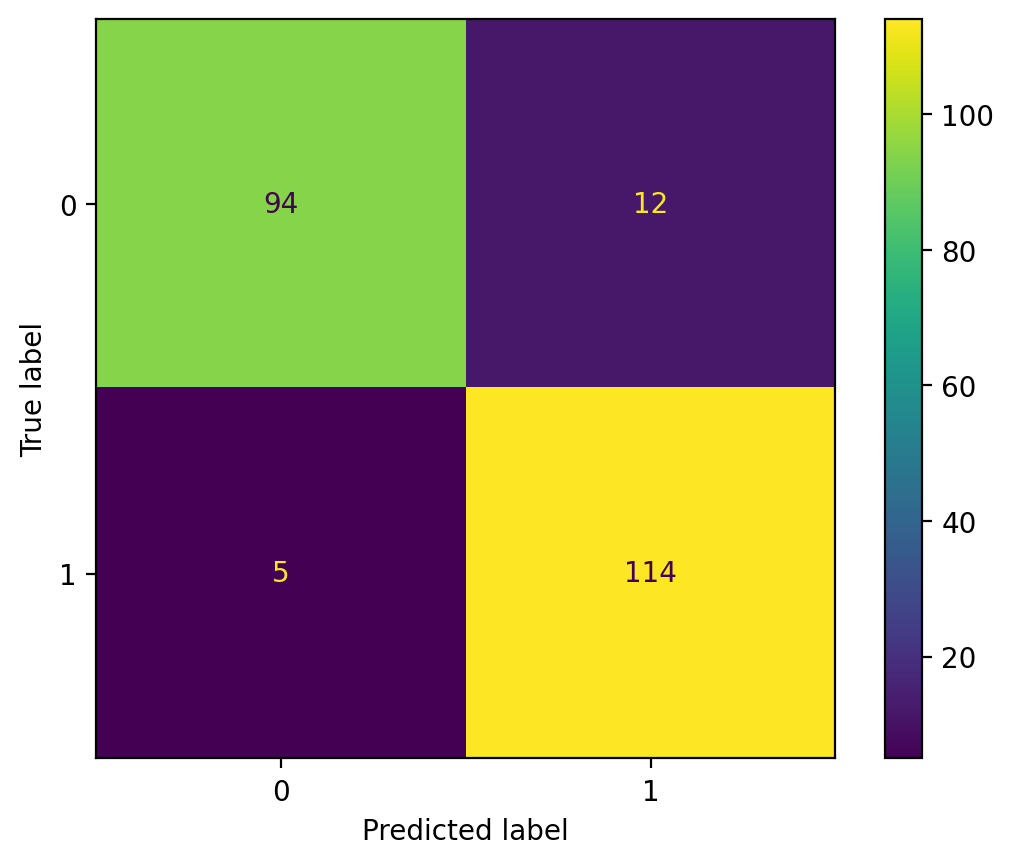

In [15]:
# using the results of the simple classifier of part 1
plot_confusion_matrix(classifier,X, y)

# The first argument of the metrics functions is the exact labels, 
# the second argument is the predictions:

print("{:20s} {:.3f}".format("precision", precision_score(y, y_pred)))
print("{:20s} {:.3f}".format("recall", recall_score(y, y_pred)))
print("{:20s} {:.3f}".format("f1", f1_score(y, y_pred)))

**Suppose you want to buy one of these beers, which metric between precision and recall would you rely more on?**

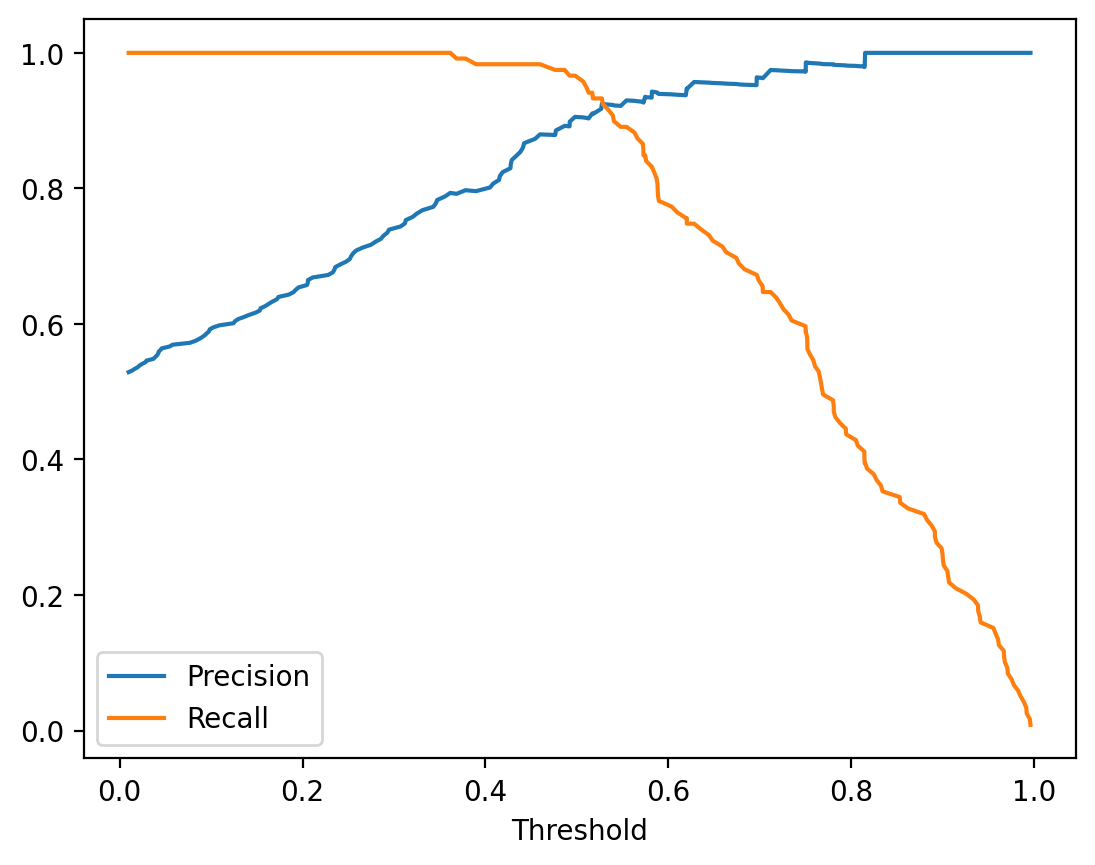

In [16]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

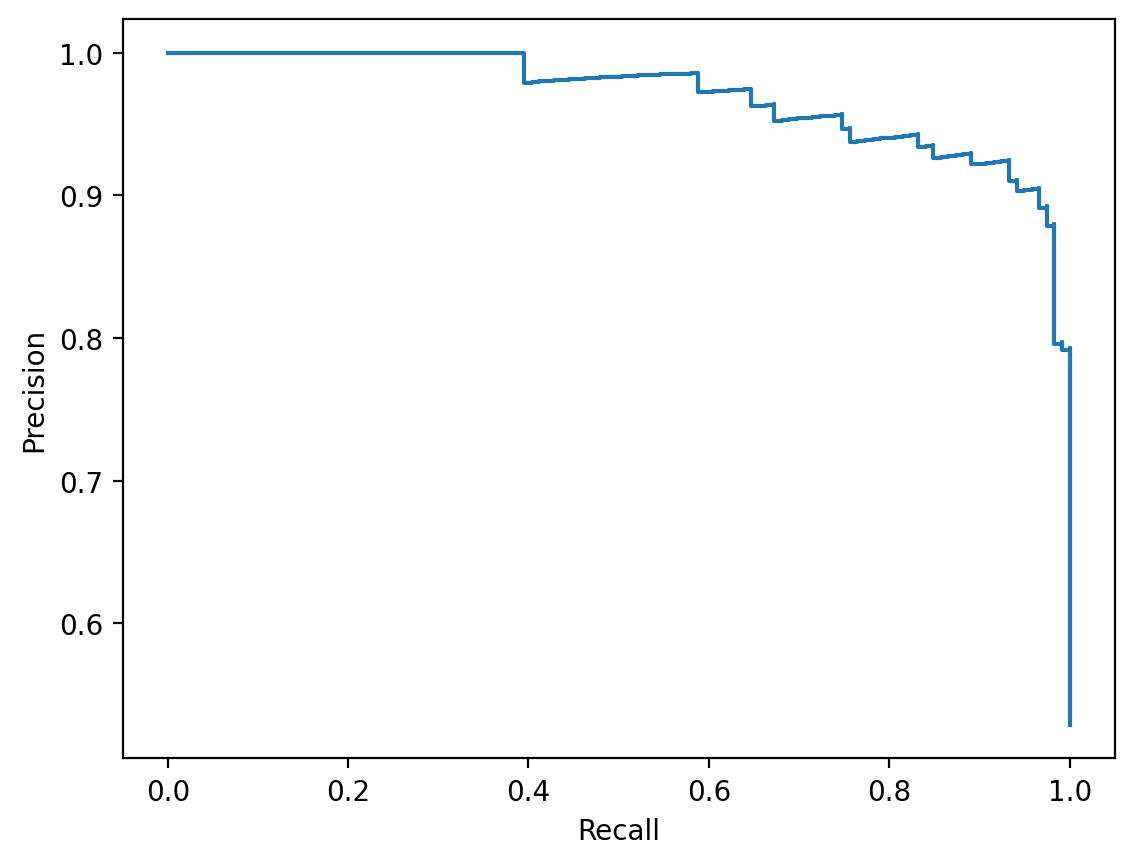

In [17]:
# Precision against recall
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

auc                  0.970


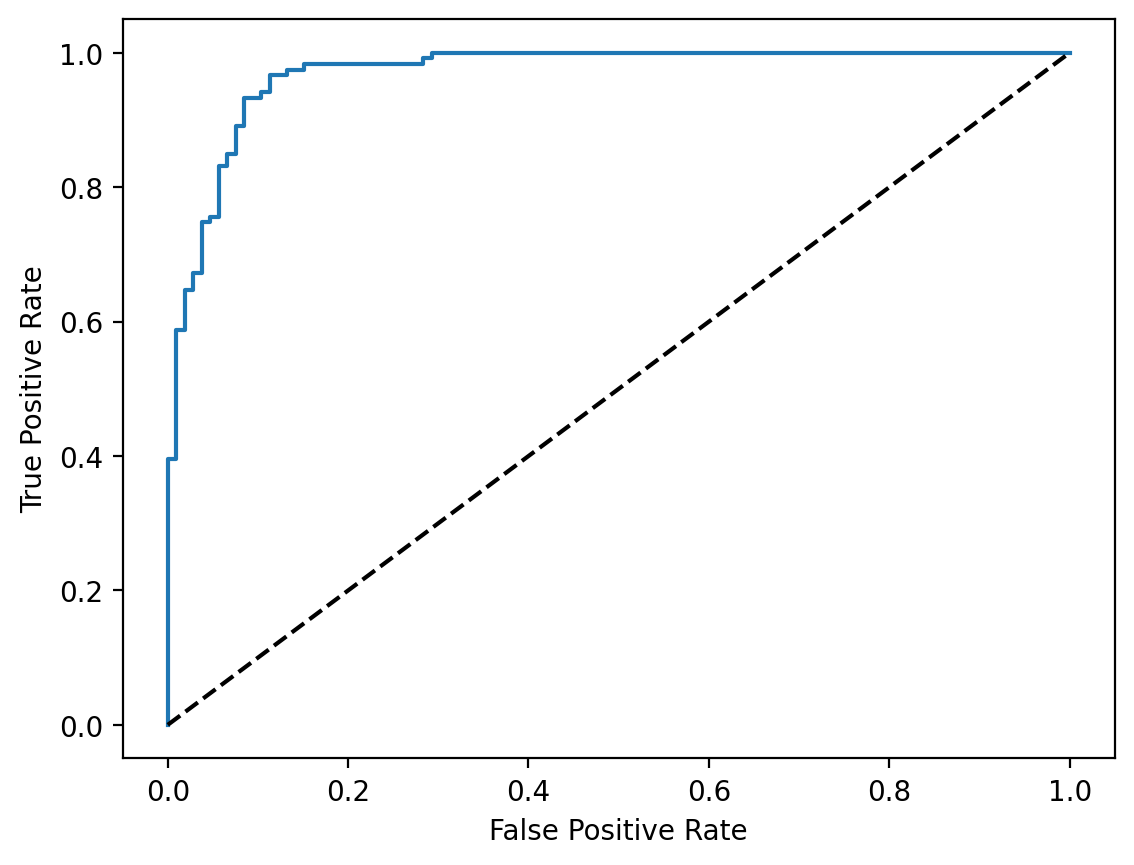

In [18]:
# ROC curve. Goal: maximize area below curve
# 45°-curve: performance of a random classifier
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y, y_scores)))

ROC shows trade-offs between sensitivity (false positive rate) and specificity (true positive rate, or recall)

 ### Two helper functions

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def samples_color(ilabels, colors=["steelblue", "chocolate"]):
    '''Return colors list from labels list given as indices.'''
    return [colors[int(i)] for i in ilabels]

def plot_decision_surface(
    features_2d, labels, classifier, preprocessing=None,
    plt=plt, marker='.', N=100, alpha=0.2, colors=["steelblue", "chocolate"], title=None,
    test_features_2d=None, test_labels=None, test_s=60,
):
    '''Plot a 2D decision surface for a already trained classifier.'''

    # sanity check
    assert len(features_2d.columns) == 2

    # pandas to numpy array; get min/max values
    xy = np.array(features_2d)
    min_x, min_y = xy.min(axis=0)
    max_x, max_y = xy.max(axis=0)

    # create mesh of NxN points; tech: `N*1j` is spec for including max value
    XX, YY = np.mgrid[min_x:max_x:N*1j, min_y:max_y:N*1j]
    points = np.c_[XX.ravel(), YY.ravel()] # shape: (N*N)x2

    # apply scikit-learn API preprocessing
    if preprocessing is not None:
        points = preprocessing.transform(points)
    
    # classify grid points
    classes = classifier.predict(points)

    # plot classes color mesh
    ZZ = classes.reshape(XX.shape) # shape: NxN
    plt.pcolormesh(
        XX, YY, ZZ,
        alpha=alpha, cmap=matplotlib.colors.ListedColormap(colors), shading='auto'
    )
    # plot points
    plt.scatter(
        xy[:,0], xy[:,1],
        marker=marker, color=samples_color(labels, colors=colors),
    );
    # set title
    if title:
        if hasattr(plt, 'set_title'):
            plt.set_title(title)
        else:
            plt.title(title)
    # plot test points
    if test_features_2d is not None:
        assert test_labels is not None
        assert len(test_features_2d.columns) == 2
        test_xy = np.array(test_features_2d)
        plt.scatter(
            test_xy[:,0], test_xy[:,1],
            s=test_s, facecolors='none', color=samples_color(test_labels),
        );


In the logistic regression you can choose two main parameters: 

- The type of regularization (as in lasso, ridge or elastic net)
- The strength of the regularization: the regularization weight is passed here in "inverse" and it multiplies the classification loss, not the regularization penalty, meaning that lower values imply stronger regularization:

$$cost = C \cdot classification loss + regularization penalty$$


The <strong>classification loss</strong> in logistic regression is a so called <em>negative-log likelihood</em>, i.e. a negative logarithm of the logistic probability above:

$$classification.loss = -\log(p(x^k; p^k)) = \log{\left(1+\exp{\left(y^k\left(b - \sum_{i=1}^{n} w_i x_i^k\right)\right)}\right)}$$

where $y^k$ is -1 or 1, representing class of $k$-th sample from the training data, corresponding, respectively, to class below and above the threshold (the separation line).

The $+/-$ sign for the class penalizes missclassifications. If sample is below the threshold $\sum_{i=1}^{n} w_i x_i^k < b$ and have the correct class $y^k = -1$, then we have $\exp{\left(negative.value\right)}$ giving small loss. In case of misclassification $\exp{\left(positive.value\right)}$ gives a much bigger loss.


In [32]:
from sklearn.model_selection import train_test_split

features_2d = beer_data.loc[:, ("alcohol_content", "bitterness")]
labelv = beer_data["is_yummy"]

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LogisticRegression(C=1) # C is the cost parameter. Default-regularization is L2
y_score=classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train))) # this calculates accuracy
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 78.57%
test score: 82.46%


Looking at the role of the classification weight parameter:

c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


With C=100

train score: 79.17%
test score: 78.95%


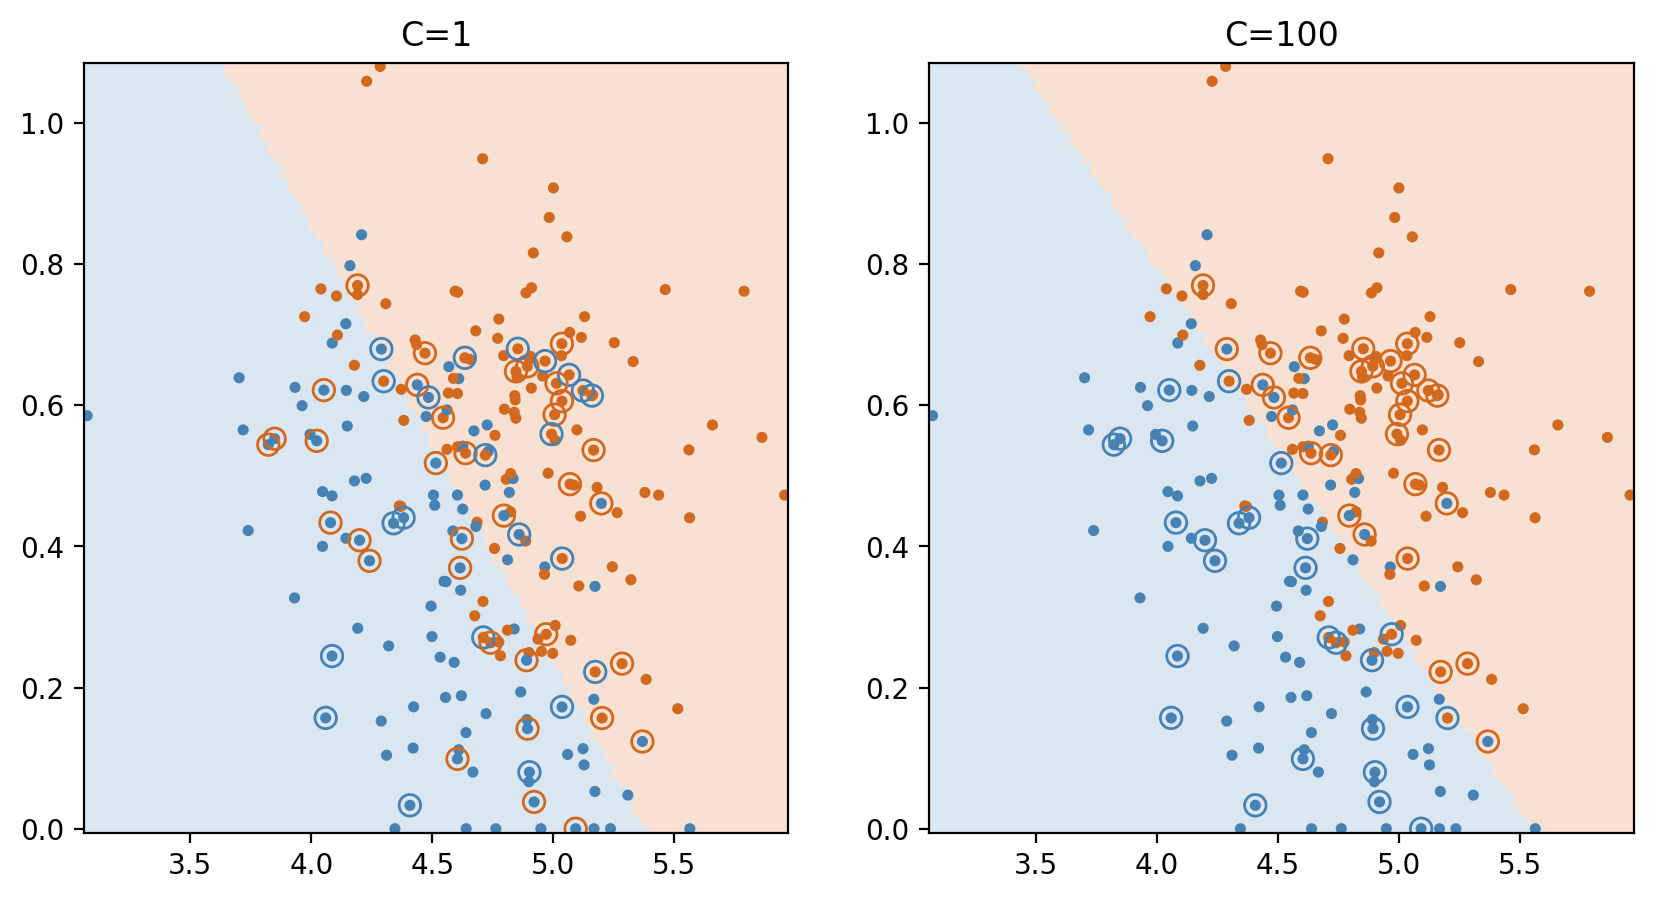

In [33]:
fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))

plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
    plt=ax_arr[0],
    title='C=1',
)
print('With C=100')
print()

classifier = LogisticRegression(C=100, random_state=0)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

y_pred = classifier.predict(X_test)
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
    plt=ax_arr[1],
    title='C=100',
)

* `C=100` => the model tries hard to get all training points correctly classified, whereas with 
* `C=1` => we allow misclassification in training, in order to possibly get more general model and avoid overfitting.

In [20]:
C_values = [0.01, 0.1, 1, 10, 100, 1000]
penalty_values = ['l1', 'l2']

print()
for norm in penalty_values:
    print('# Norm ', norm)
    print()
    for C in C_values:
        print('## C: ', C)
        # Note: increase max iterations 10x for solver's convergence
        classifier = LogisticRegression(C=C, penalty=norm, dual=False, max_iter=10000, solver='liblinear')
        classifier.fit(X_train, y_train)
        print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
        # print('weights: ', classifier.coef_[0])
    print()


# Norm  l1

## C:  0.01
test score: 50.88%
## C:  0.1
test score: 49.12%
## C:  1
test score: 78.95%
## C:  10
test score: 78.95%
## C:  100
test score: 78.95%
## C:  1000
test score: 78.95%

# Norm  l2

## C:  0.01
test score: 49.12%
## C:  0.1
test score: 56.14%
## C:  1
test score: 64.91%
## C:  10
test score: 78.95%
## C:  100
test score: 80.70%
## C:  1000
test score: 78.95%



## An overview of classifiers

### Nearest Neighbors
The idea is very simple: to classify a sample $x$ look for **$N$ closests samples in the training data** (by default, using the Euclidean distance) and take **majority of their labels** as a result.

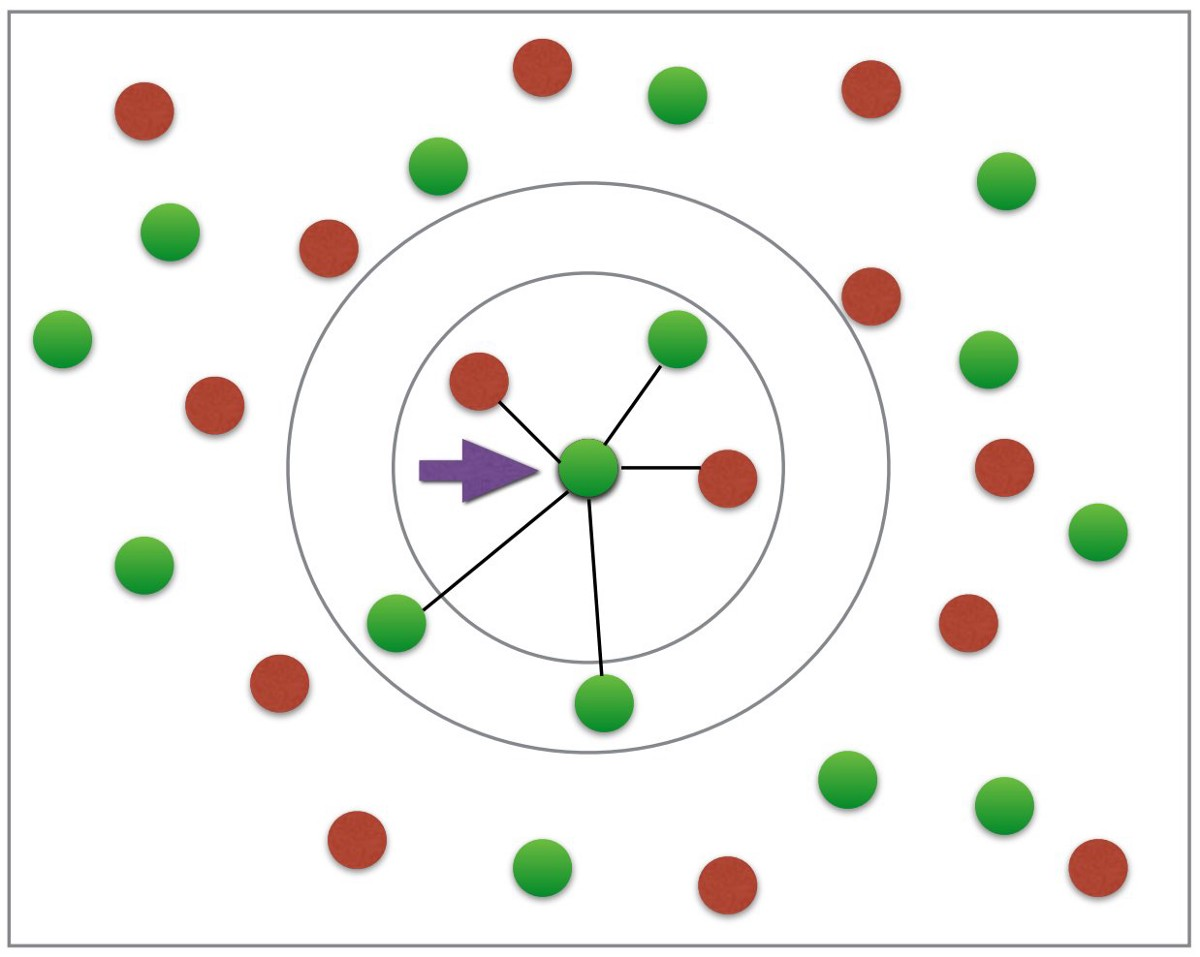

train score: 87.50%
test score: 78.95%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


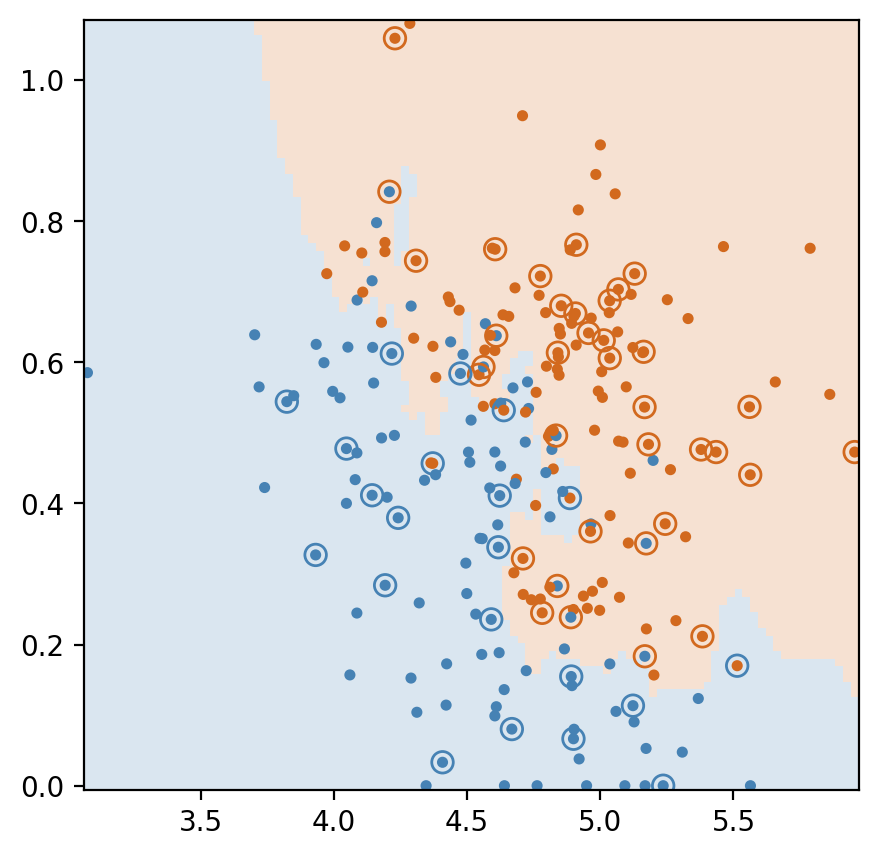

In [34]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=10)

# Let's use 5 neighbors to learn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
)

About the plot: **the points surrounded by a circle are from the test data set** (not used for learning), all other points belong to the training data. The color of the marker is the true label (blue corresponds to 0 and orange to 1) and the circle is the predicted label.

In [22]:
print('F1 score on training: {:.2f}%'.format(100*f1_score(y_train, y_train_pred)))
print('F1 score on test: {:.2f}%'.format(100*f1_score(y_test, y_pred)))

F1 score on training: 88.14%
F1 score on test: 82.35%


Changing the parameters:


# Distance  1

## Nb neighbors:  1
test score: 73.68%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


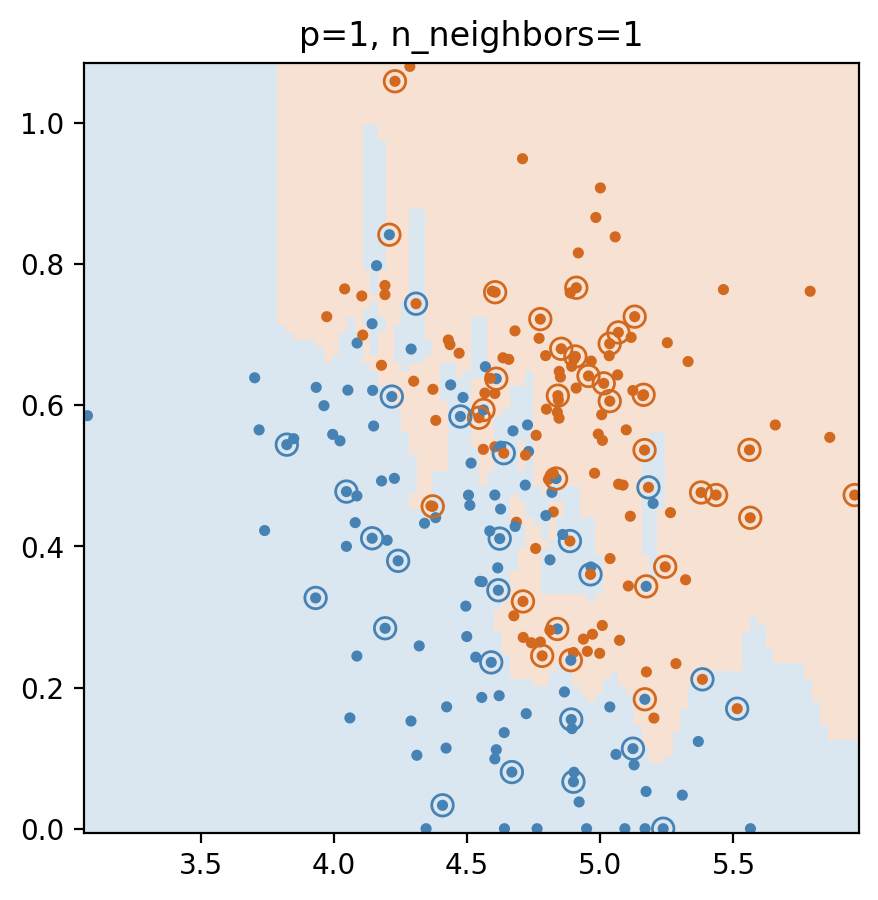

## Nb neighbors:  10
test score: 78.95%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


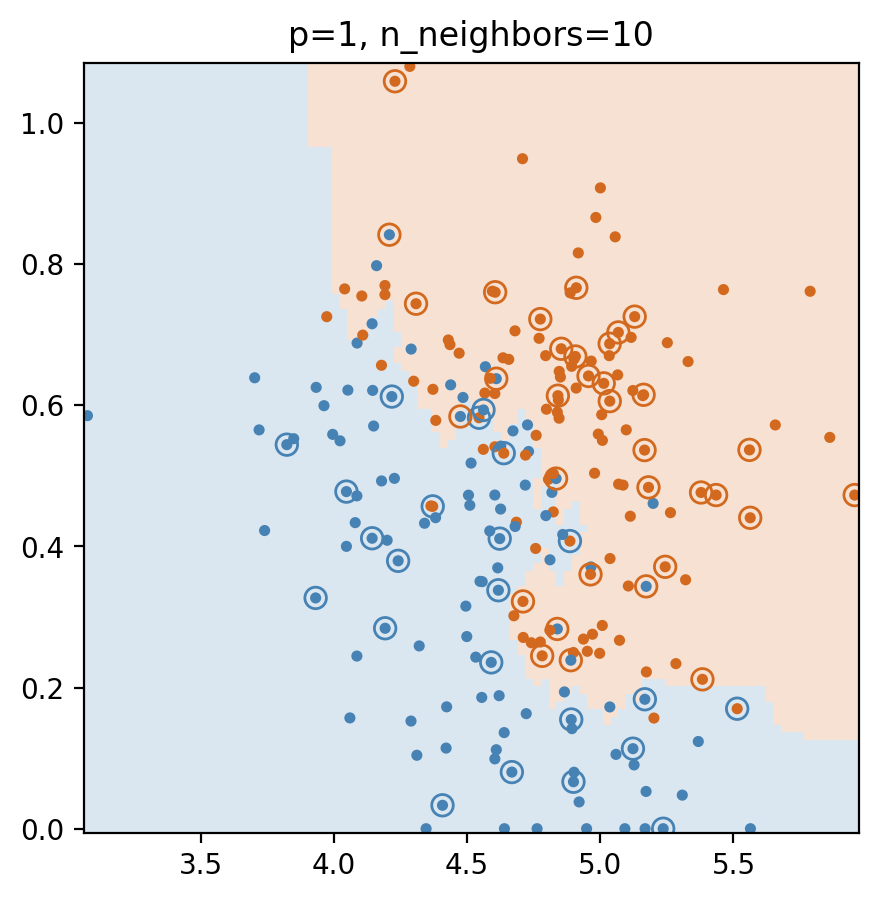

## Nb neighbors:  100
test score: 71.93%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


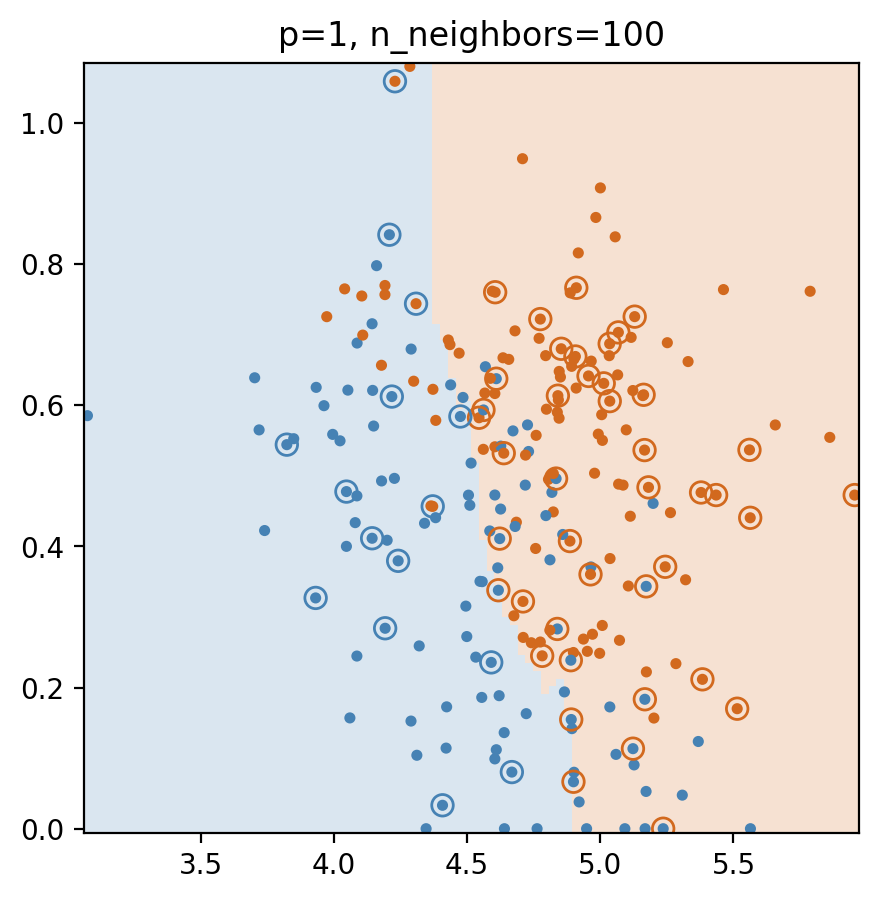


# Distance  2

## Nb neighbors:  1
test score: 73.68%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


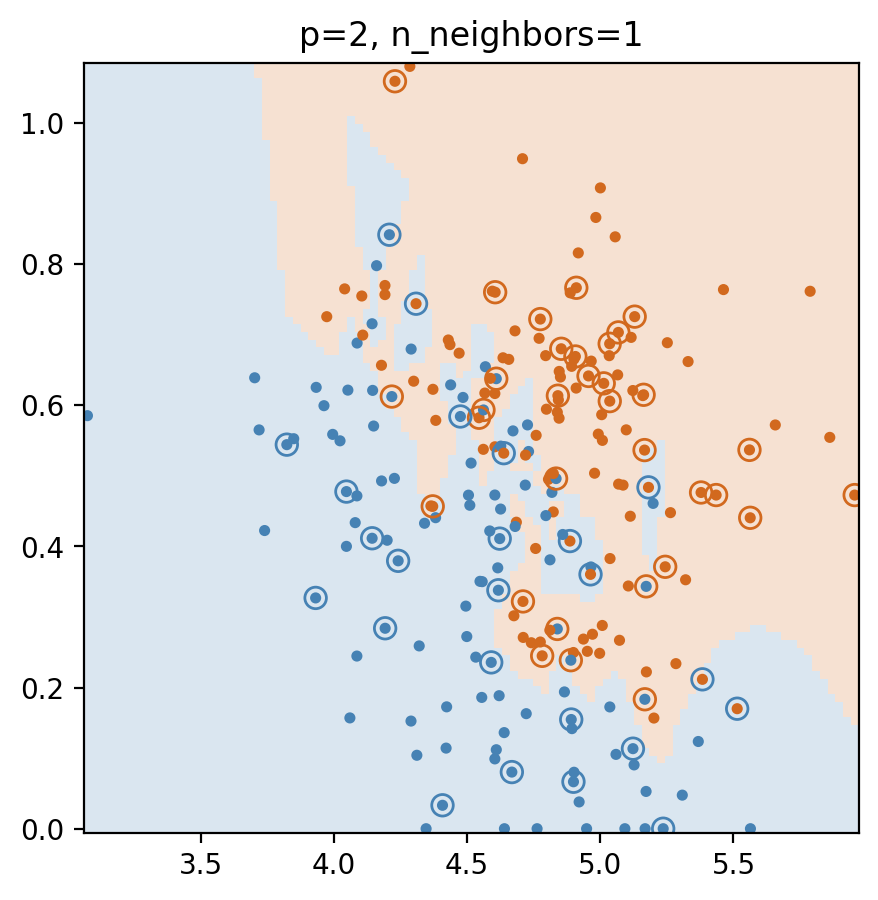

## Nb neighbors:  10
test score: 73.68%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


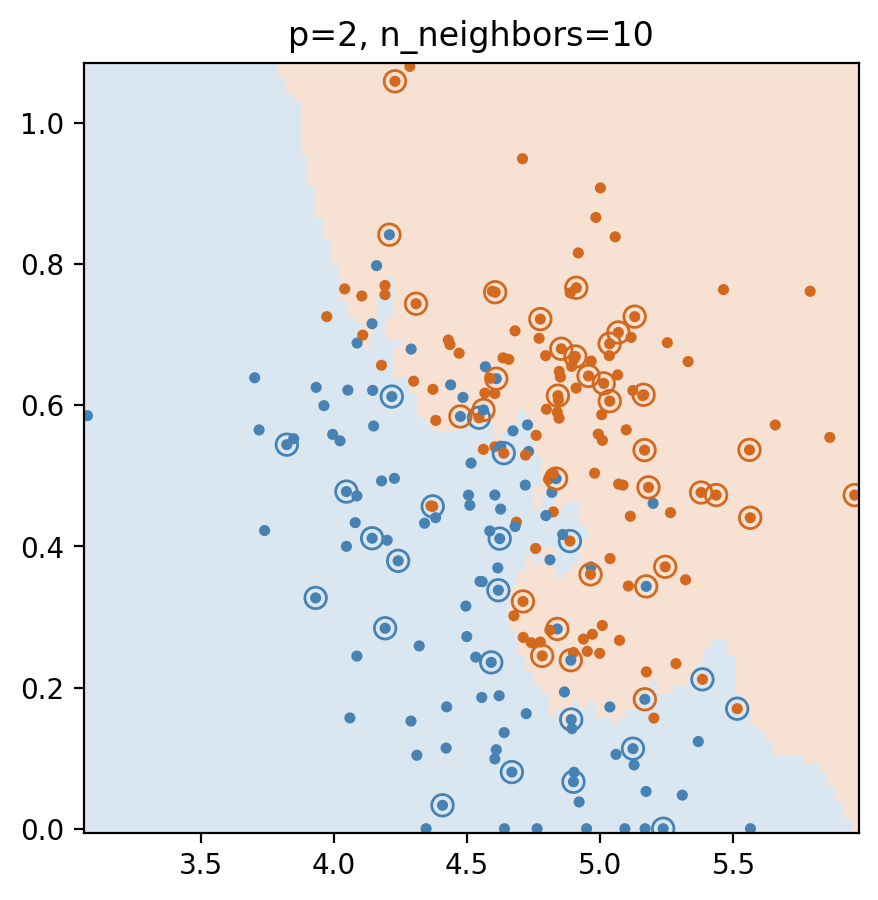

## Nb neighbors:  100
test score: 75.44%


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


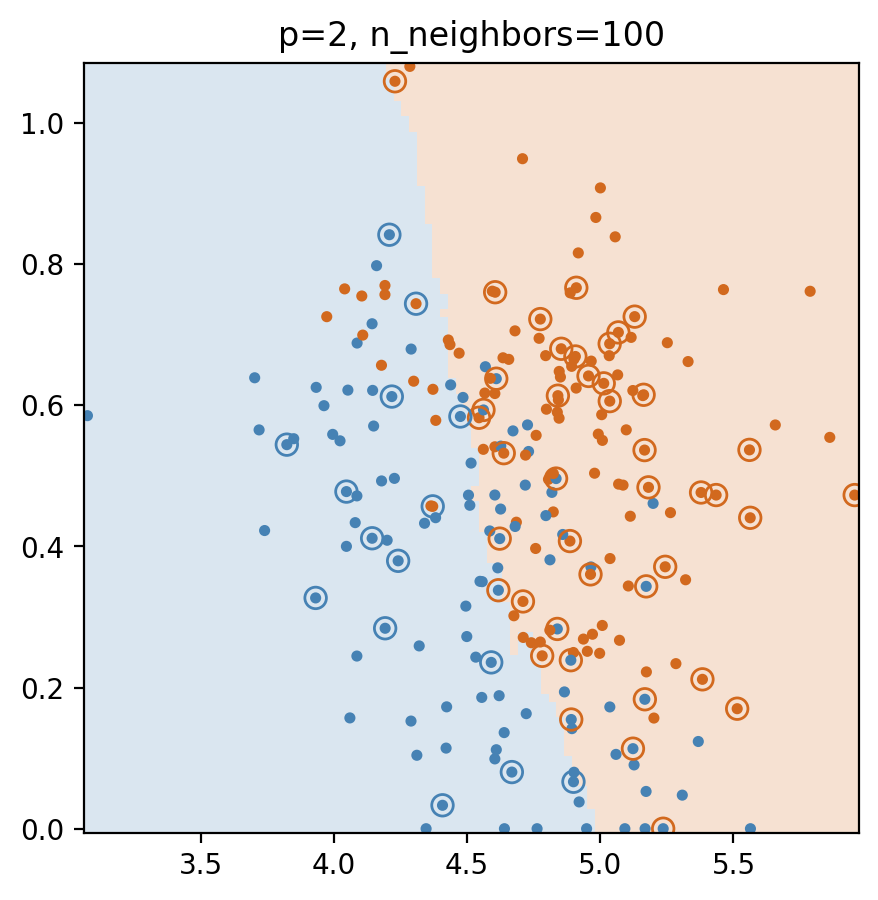

In [36]:
# the hyperparameters: number of neigbors and the method to compute distance

n_neighbors_list = [1, 10, 100]
p_list = [1, 2] #1=Manhatan distance norm ; 2=Euclidian distance

print()
for p in p_list:
    print('# Distance ', p)
    print()
    for n_neighbors in n_neighbors_list:
        print('## Nb neighbors: ', n_neighbors)
        # Note: increase max iterations 10x for solver's convergence
        classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        classifier.fit(X_train, y_train)
        print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
        # print('weights: ', classifier.coef_[0])
        y_pred = classifier.predict(X_test)
        plt.figure(figsize=(5, 5))
        plt.title("p={}, n_neighbors={}".format(p, n_neighbors))
        plot_decision_surface(
            features_2d, labelv, classifier,
            test_features_2d=X_test, test_labels=y_pred,
        )
        plt.show()
    print()

# Ensembles and XGBoost

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
features = pd.DataFrame(data = np.c_[iris.data,iris.target], columns = iris.feature_names + ['label'])
features.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

## Random Forest Model

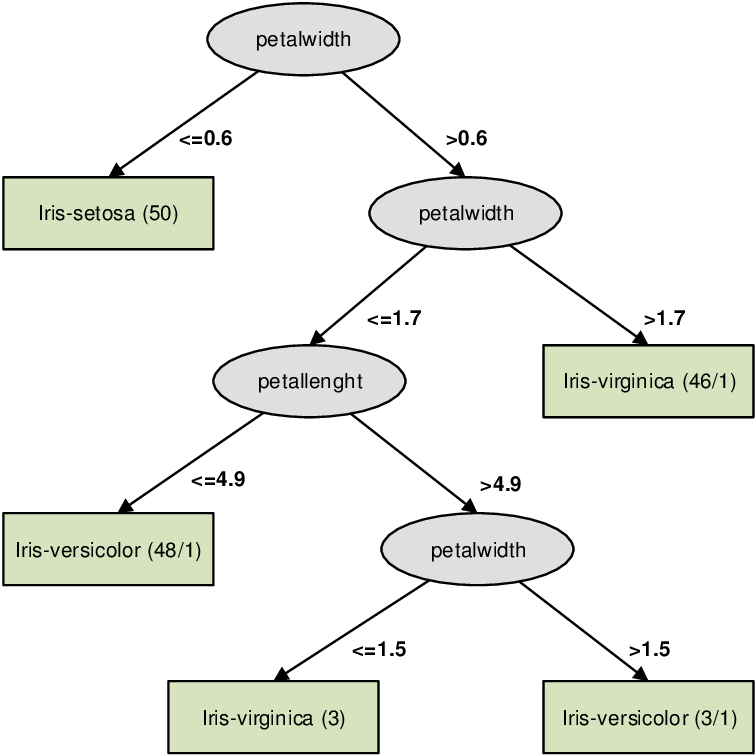

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

In [40]:
from sklearn.metrics import accuracy_score

# Fit
classifier.fit(X_train, Y_train)

# Predict
y_pred = classifier.predict(X_test)

print(accuracy_score(Y_test,y_pred))

0.9777777777777777


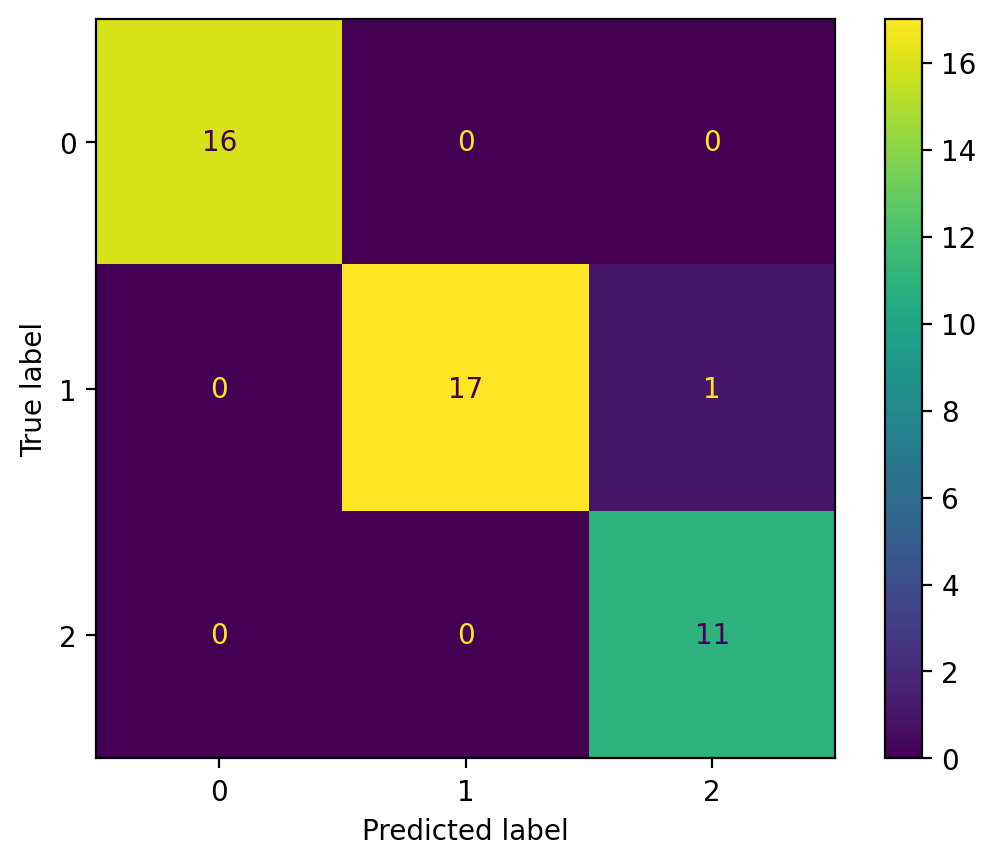

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test)

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred2 = rnd_clf.predict(X_test)

print(accuracy_score(Y_test,y_pred2))

0.9777777777777777


## Feature Importance

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


## Gradient Boosting with xgboost

In [30]:
!pip install xgboost

# can be used both for regression and classification

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
bdata = pd.DataFrame(boston.data, columns=boston['feature_names'])
X, y = bdata.iloc[:,:], boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=123)

eval_set = [(X_val, y_val)]

In [50]:
import xgboost as xgb

### Main Hyperparameters:

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
* eval_metric: evaluation metrics for validation data

### Regularization Parameters:

* gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* alpha: L1 regularization on leaf weights. A large value leads to more regularization.
* lambda: L2 regularization on leaf weights and is smoother than L1 regularization.


In [51]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', # linear regression with mean squared error as objective function
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [54]:
xg_reg.fit(X_train,y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True) # to use early stopping, need validation set

preds = xg_reg.predict(X_test)

[0]	validation_0-rmse:21.06031
[1]	validation_0-rmse:19.10501
[2]	validation_0-rmse:17.37366
[3]	validation_0-rmse:15.77587
[4]	validation_0-rmse:14.40675
[5]	validation_0-rmse:13.13971
[6]	validation_0-rmse:11.97062
[7]	validation_0-rmse:10.96127
[8]	validation_0-rmse:10.02664
[9]	validation_0-rmse:9.21249


c:\Users\kschuepbach\.conda\envs\brj-course\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [55]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.547543


In [56]:
# back to classification
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

In [57]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9777777777777777


## k-fold cross validation

In [58]:
##go back to house data
# before, default hyperparameters were used (or just one combination of hyperparameters). 
# Now, check which combination is best.

from xgboost import DMatrix
data_dmatrix = DMatrix(data=X,label=y)

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.

In [59]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [60]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        21.750757        0.036152       21.765522       0.028850
1        19.778532        0.077649       19.830760       0.031761
2        18.052811        0.118632       18.157337       0.116038
3        16.458958        0.169188       16.623975       0.191413
4        15.074781        0.183545       15.254608       0.213613

## Visualize the Trees

In [42]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
!pip install graphviz

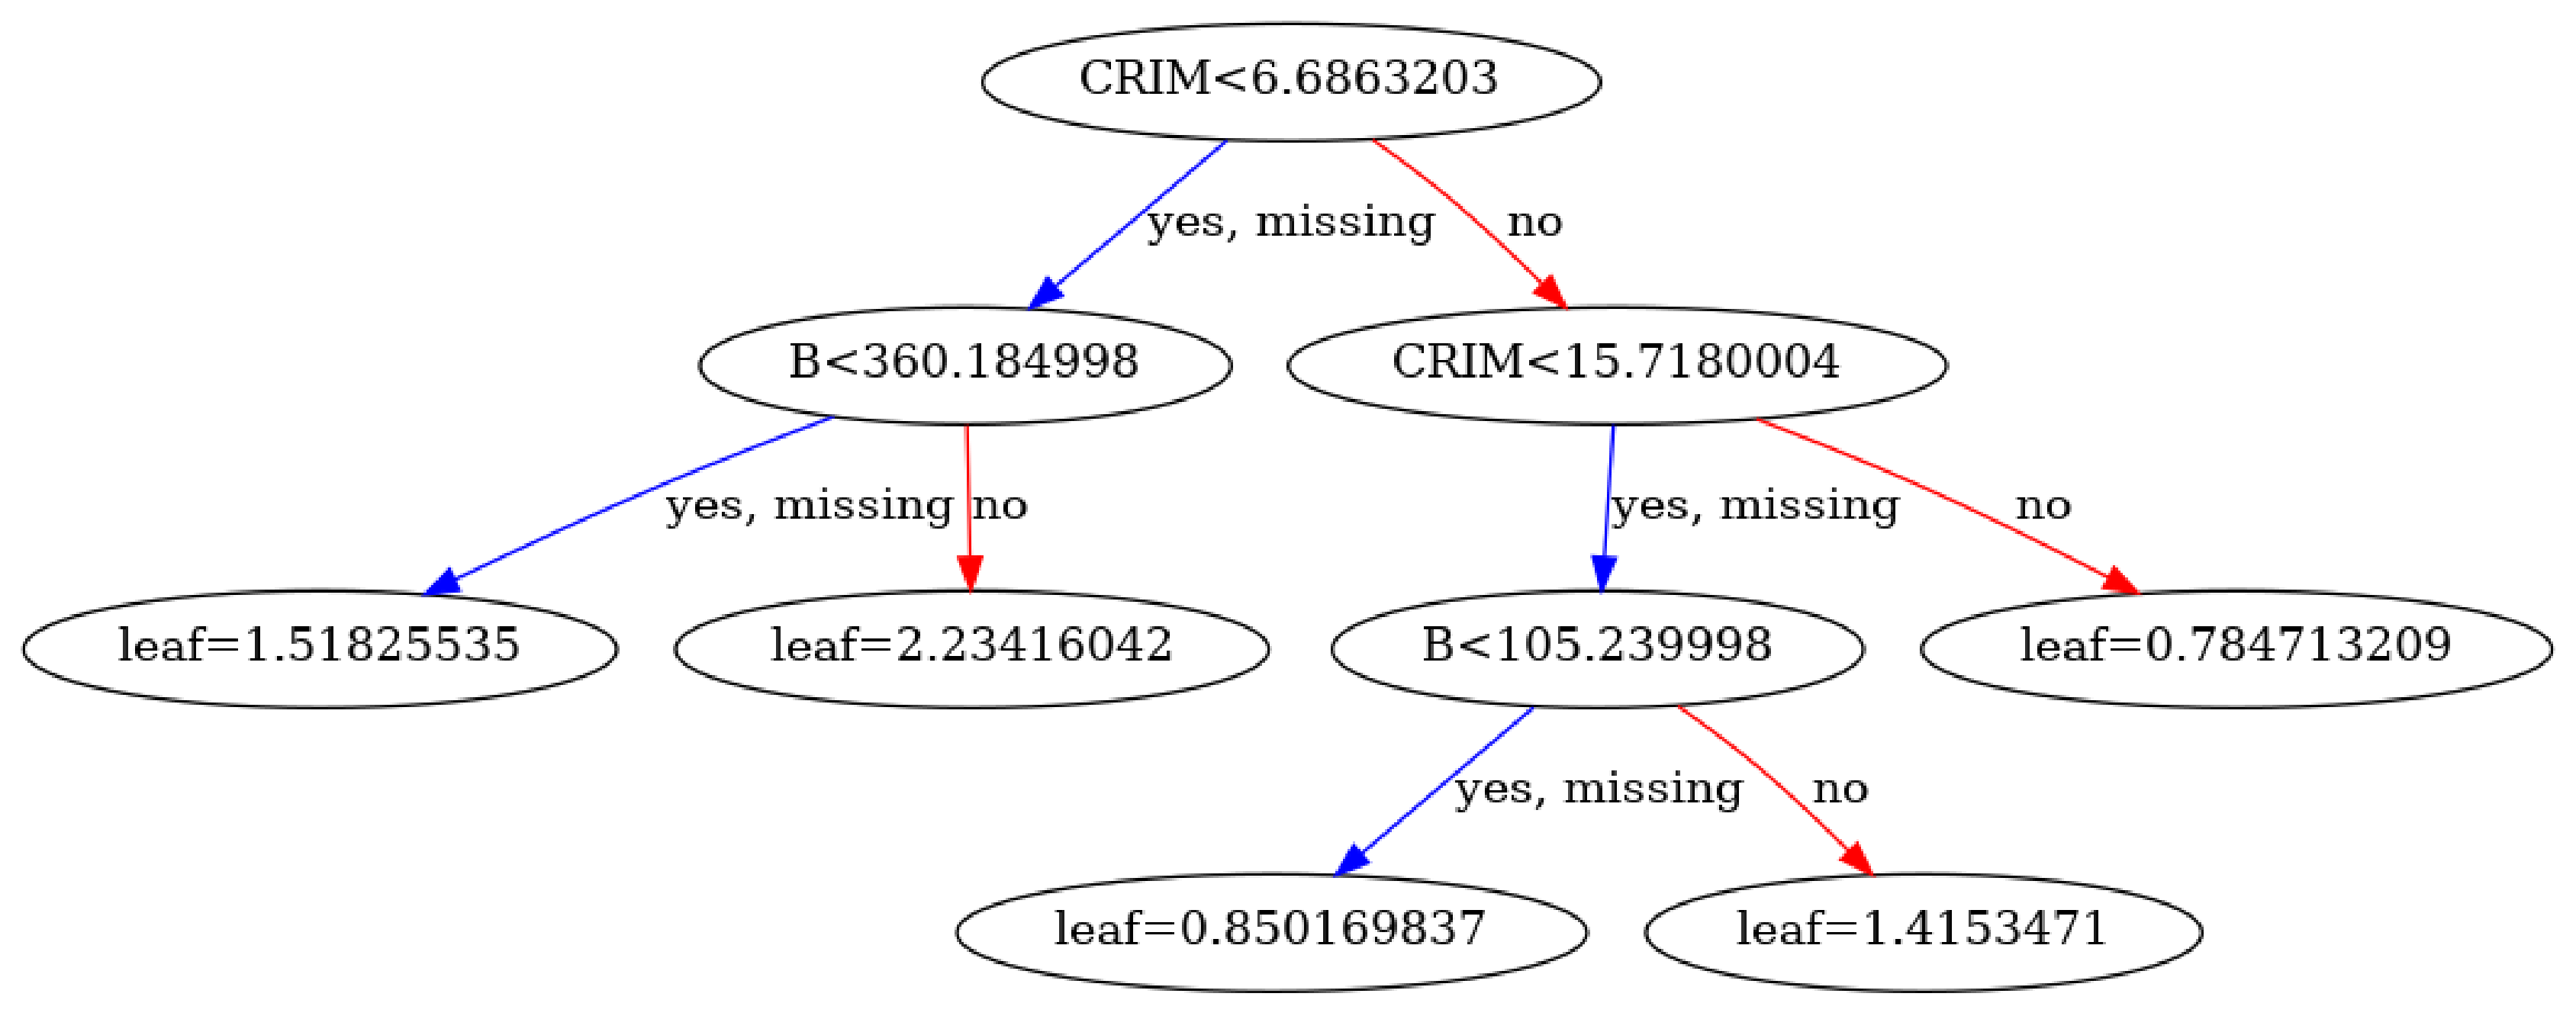

In [46]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

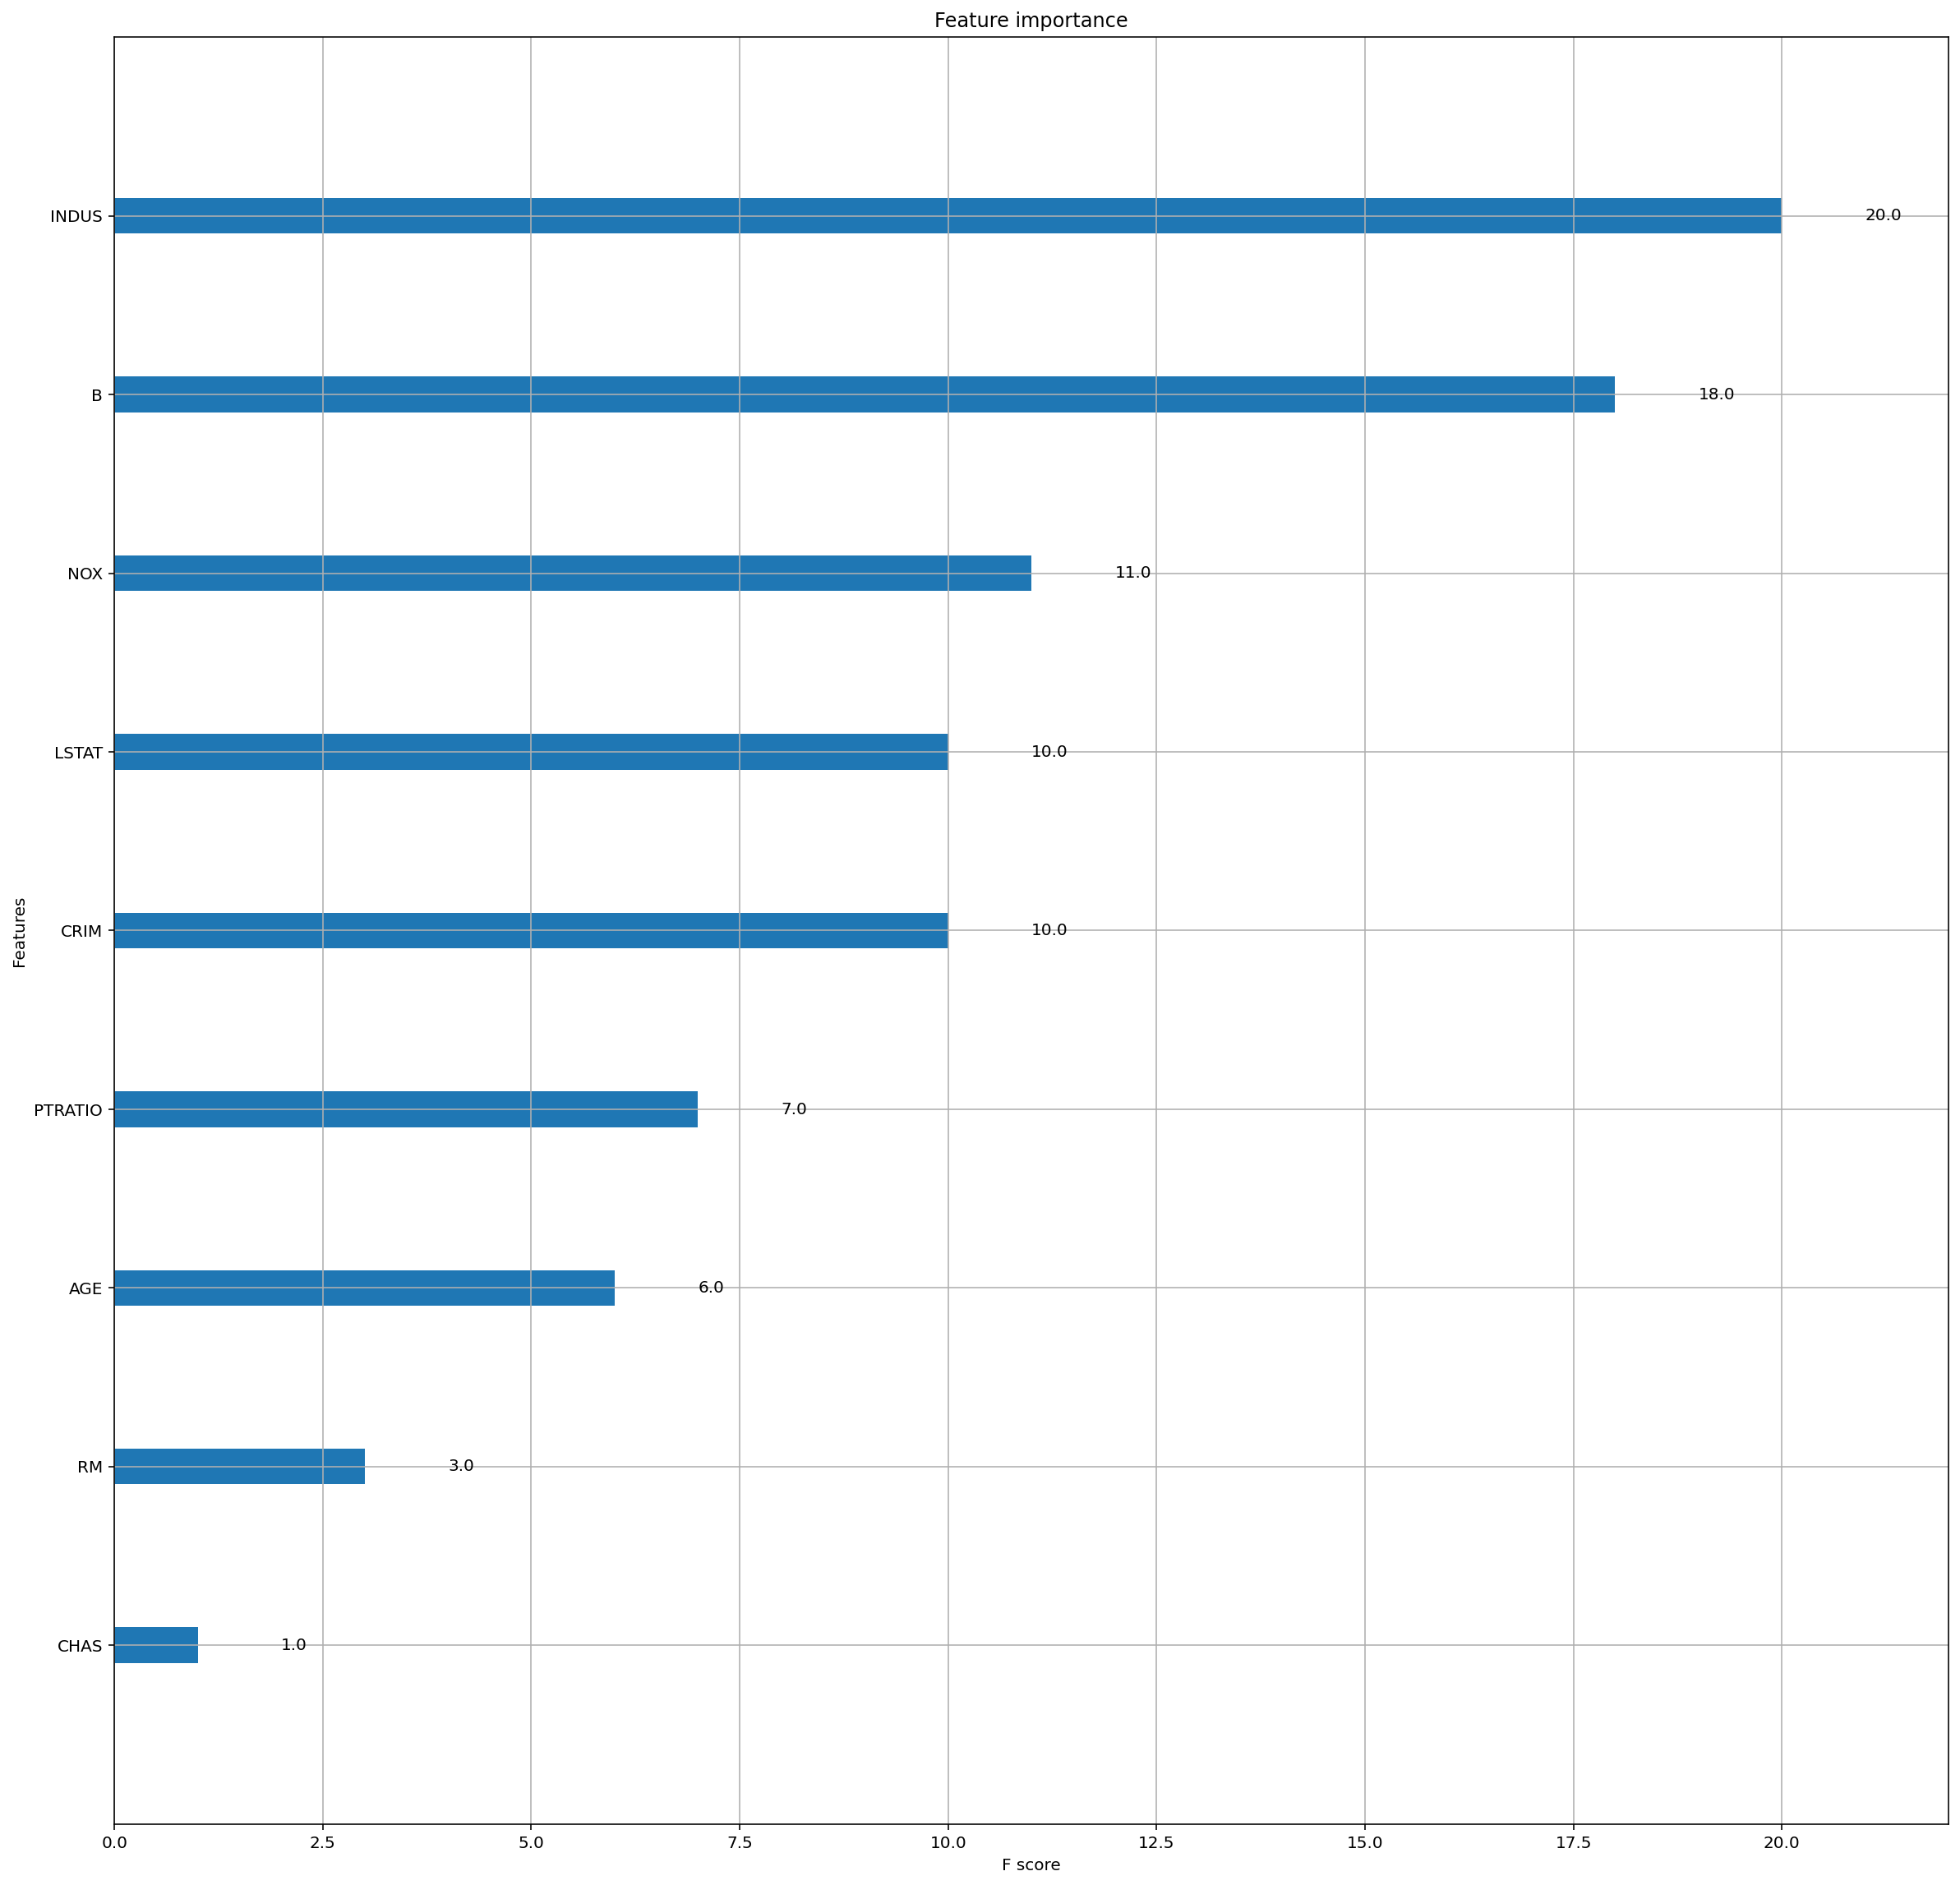

In [44]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Extras

### Linear SVM

Support-Vector Machine (SVM) classifier tries to separate two classes with a line by **finding data points (support vectors) lying closest to the separation plane**. These points determine separation plane (weights and threshold/intercept).

The weights are learned such that the **margin between support vectors of different classes is maximized**.

Like in linear regression the classification is based on a weighted sum of the features (and margin maximization corresponds to minimization of the regularization penalty). 

Analogously to the Nearest Neighbors method the data points (support vectors) decide the class of a new data sample.

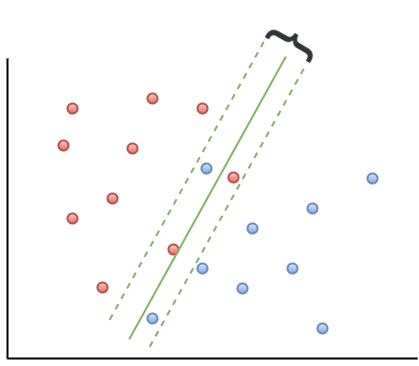

#### Demonstration: linear separable data

In [47]:
df = pd.read_csv('https://www.dropbox.com/s/teu84r9g8jxmwka/line_separable_2d.csv?dl=1')
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LinearSVC(C=1)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 98.67%
test score: 96.00%


feature weights: [[0.158554   1.01077516]]


With C=100

train score: 100.00%
test score: 92.00%
feature weights: [[0.81571299 8.45146363]]


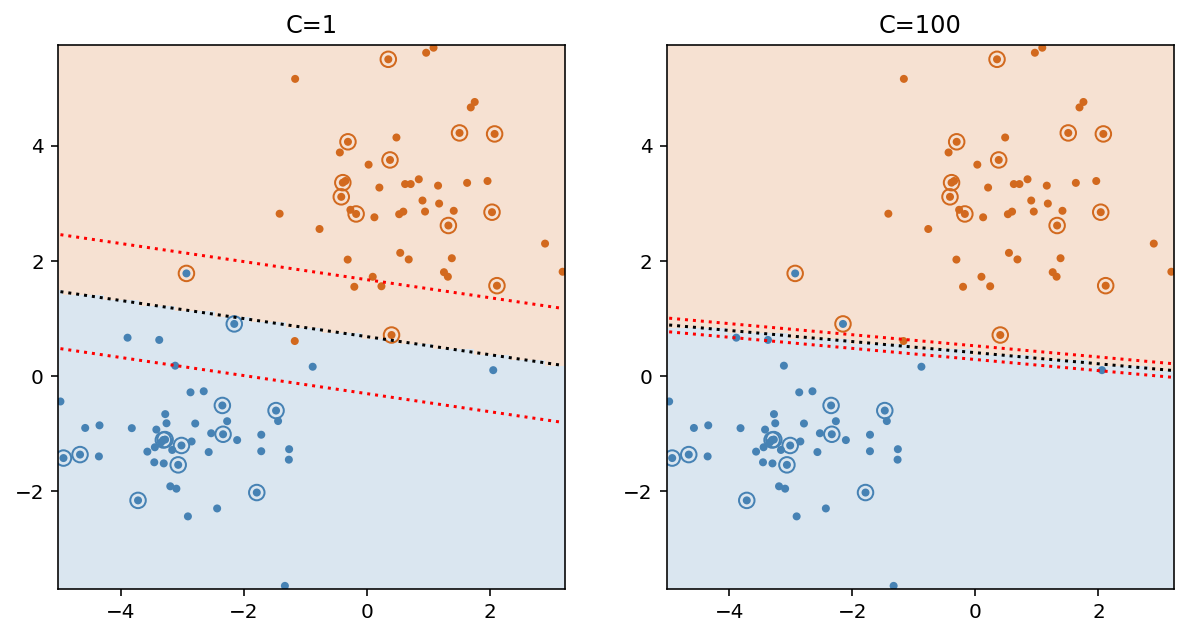

In [48]:
fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))
y_pred = classifier.predict(X_test)                                                    
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
    plt=ax_arr[0],
    title='C=1', 
)

print("feature weights:", classifier.coef_)

def plot_margins(features_2d, linear_classifier, plt=plt):
    '''Plot a separation line and margin lines for 2D dataset'''
    
    assert hasattr(linear_classifier, 'coef_') 
    
    w = linear_classifier.coef_[0]
    b = -linear_classifier.intercept_ # NOTE: intercept = negative threshold

    # separation line: w[0] * x + w[1] * y - b == 0
    feat_x = features_2d.iloc[:, 0]
    x = np.linspace(np.min(feat_x), np.max(feat_x), 2)
    y =  (b - w[0] * x) / w[1]
    plt.plot(x, y, color='k', linestyle=':');

    # margin lines: w[0] * x + w[1] * y - b == +/-1
    y =  ((b - 1) - w[0] * x) / w[1]
    plt.plot(x, y, color='r', linestyle=':');
    y =  ((b + 1) - w[0] * x) / w[1]
    plt.plot(x, y, color='r', linestyle=':');

plot_margins(features_2d, classifier, plt=ax_arr[0])


print()
print()
print('With C=100')
print()
                                                      
# higher C = more narrow ("harder") margin
# Note: increase max iterations 50x for solver's convergence
classifier = LinearSVC(C=100, max_iter=50000)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
print("feature weights:", classifier.coef_)
y_pred = classifier.predict(X_test)  
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
    plt=ax_arr[1],
    title='C=100', 
)
plot_margins(features_2d, classifier, plt=ax_arr[1]);

#### Demonstration: circle data

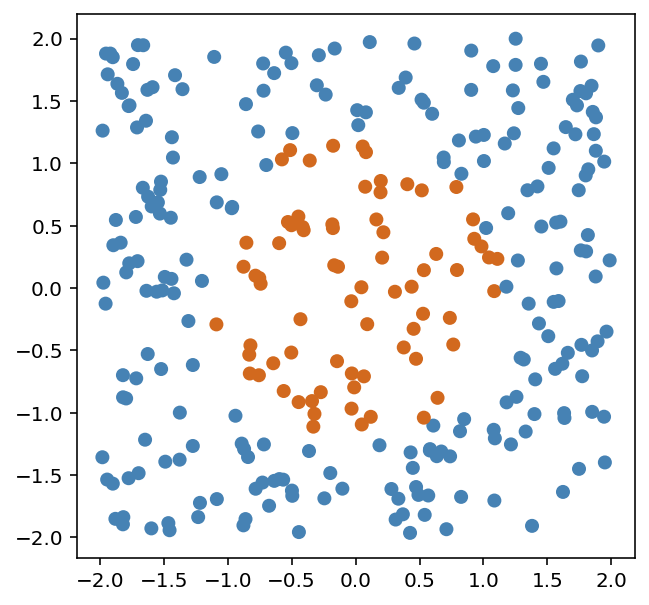

In [49]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/s/apaqf6rfasgw4fv/circle.csv?dl=1')
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

plt.figure(figsize=(5, 5))
plt.scatter(features_2d.iloc[:,0], features_2d.iloc[:,1], color=samples_color(labelv));

score: 81.33%
feature weights: [[-0.00750903 -0.01536219]]


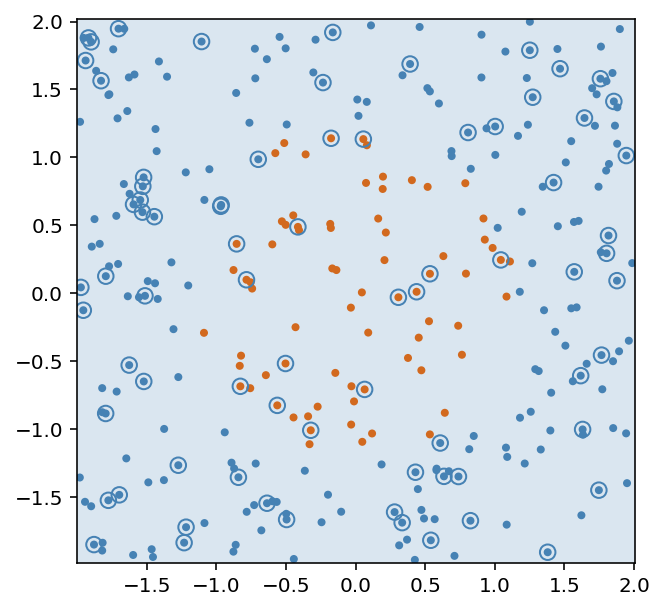

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LinearSVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test.iloc[:,:2], test_labels=y_pred,
)

print("feature weights:", classifier.coef_)

### Kernel based SVM
Data is usually not at all linearily separable.

train score: 98.67%
test score: 96.00%
#support vectors: [130  51]


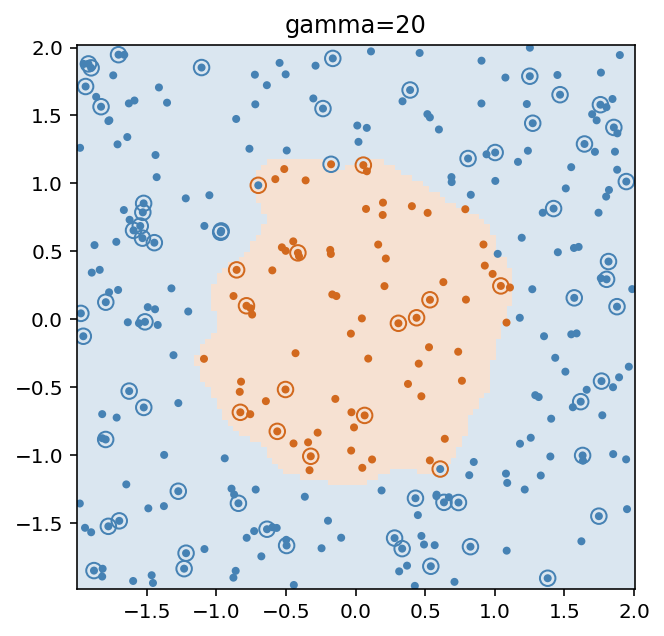

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

# specify kernel and gamma
classifier = SVC(kernel='rbf', gamma=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

# NOTE: mapping is implicit - feature weights are not there anymore (coef_);
#       instead we have only support vectors (and their weights; dual_coef_).
#
# Let's just see how many of samples are used as support vectors for each class.
print('#support vectors:', classifier.n_support_)

plt.figure(figsize=(5, 5))
plot_decision_surface(
    features_2d, labelv, classifier,
    test_features_2d=X_test, test_labels=y_pred,
    title='gamma=20',
)

The `gamma` parameter controls both size and *smoothness* of the decision surface.

**`gamma` parameter is crucial for a good performance!**

<div class="alert alert-block alert-warning">

<p><i class="fa fa-warning"></i>&nbsp;
Before using <strong>kernel SVM</strong> you need to <strong>scale (normalize) your features first</strong>. This is because it relies on the "similarity"/"distance" function. Otherwise, kernel SVM might not work well.</p>
    
</div>

#### How to choose `gamma`?

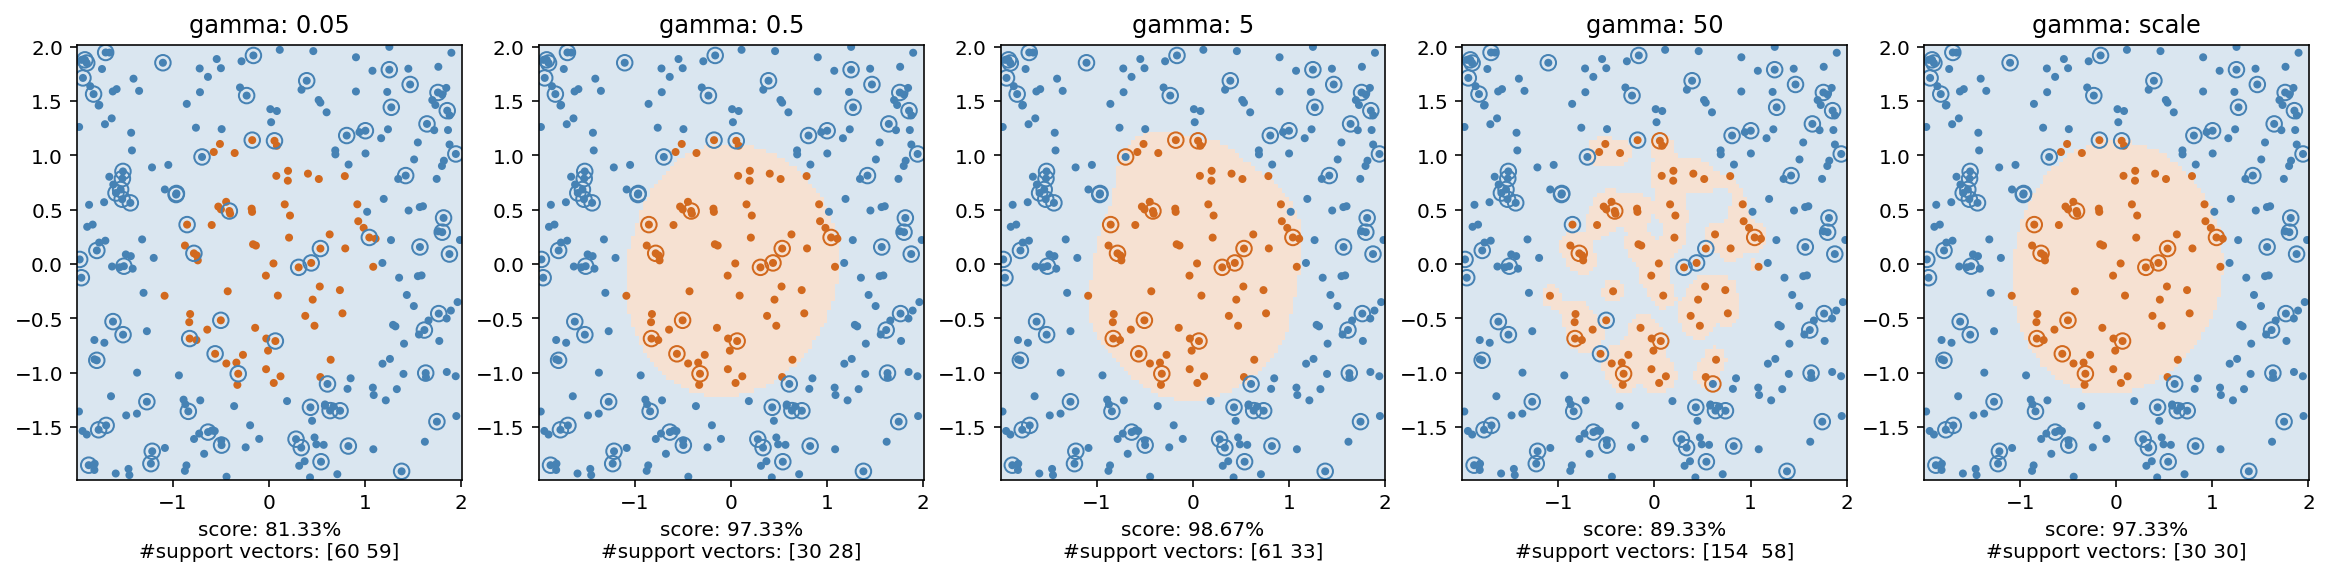

In [52]:
kernel = 'rbf'
gammas = [0.05, 0.5, 5, 50, 'scale',]

n = len(gammas)
m = 1
fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

for i, gamma in enumerate(gammas):
    classifier = SVC(kernel=kernel, gamma=gamma)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    iax = ax_arr[i]
    iax.set_title("gamma: " + str(gamma))
    iax.set_xlabel(
        'score: {:.2f}%\n#support vectors: {}'.format(
            100*classifier.score(X_test, y_test),
            classifier.n_support_,
        )
    )

    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        plt=iax,
    )


#### Which kernels do work?

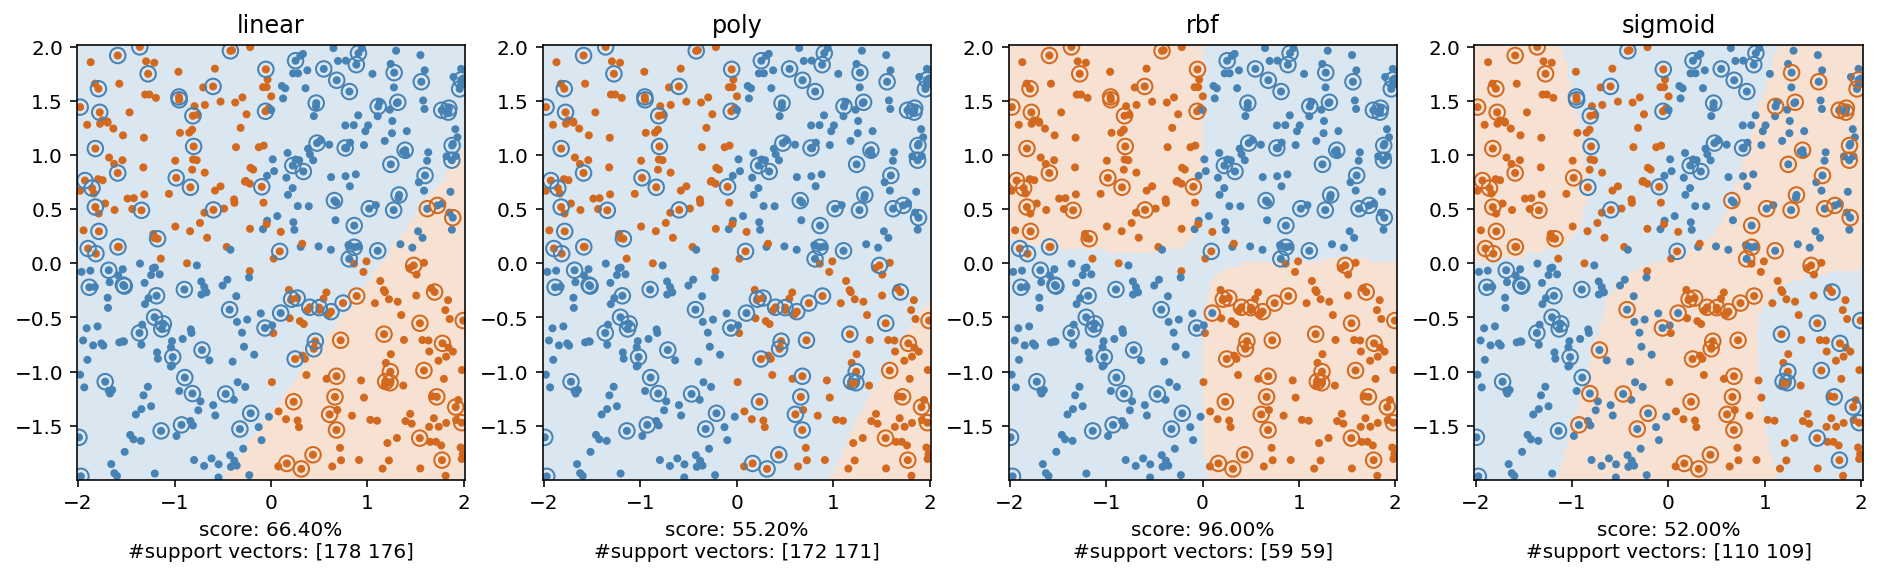

In [53]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid',]

df = pd.read_csv('https://www.dropbox.com/s/lzc6qjbrled40ht/xor.csv?dl=1')
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

kernels = ['linear', 'poly', 'rbf', 'sigmoid',]
gamma = 'scale'

n = len(kernels)
m = 1
fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

for j, kernel in enumerate(kernels):
    classifier = SVC(kernel=kernel, gamma='scale')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    iax = ax_arr[j]
    iax.set_title(kernel)
    iax.set_xlabel(
        'score: {:.2f}%\n#support vectors: {}'.format(
            100*classifier.score(X_test, y_test),
            classifier.n_support_,
        )
    )

    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        plt=iax,
    )
